In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from functools import reduce

# Configuraciones iniciales
%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [ ]:
# Carga de Datasets
train = pd.read_csv('/content/drive/MyDrive/Labo2/train/train.csv')
razas = pd.read_csv('/content/drive/MyDrive/Labo2/breed_labels.csv')
colores = pd.read_csv('/content/drive/MyDrive/Labo2/color_labels.csv')
estados = pd.read_csv('/content/drive/MyDrive/Labo2/state_labels.csv')

In [ ]:
train.shape # Vemos la forma del dataset train

(14993, 24)

In [ ]:
train.head() # Vemos las primeras filas del dataset train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [ ]:
train.describe() # Analizamos un poco los datos que trae cada columna de train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [ ]:
train.info() # Vemos la información del dataset train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

# EDA - Análisis Exploratorio de Datos

In [ ]:
train.columns # Vemos las columnas del dataset train

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [ ]:
train.isna().sum() # Vemos cuántos valores nulos hay en cada columna de train

,0
Type,0
Name,1265
Age,0
Breed1,0
Breed2,0
Gender,0
Color1,0
Color2,0
Color3,0
MaturitySize,0


##### Podemos ver que el campo Name tiene muchos valores nulos (1265), mientras que el campo Description tiene algunos valores nulos (13).

In [ ]:
# Vemos la cantidad y el porcentaje de valores en cada categoría de la columna AdoptionSpeed en forma de dataframe
train.AdoptionSpeed.value_counts().to_frame('Cantidad').assign(Porcentaje=lambda x: x/x.sum()*100)

,Cantidad,Porcentaje
AdoptionSpeed,,
4,4197,27.993063
2,4037,26.925899
3,3259,21.736811
1,3090,20.609618
0,410,2.734609


##### Un porcentaje muy bajo de mascotas son adoptadas el mismo día de publicación (2,7%), mientras que el mayor porcentaje corresponde a mascotas que no son adoptadas en absoluto (28%).

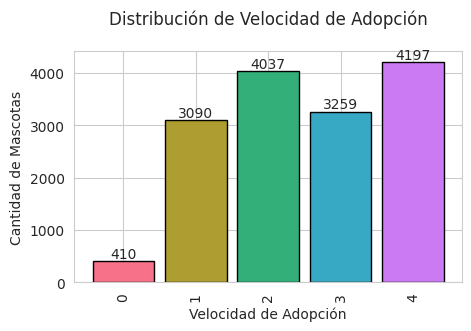

In [ ]:
# Graficamos la velocidad de Adopción

plt.figure(figsize=(5, 3)) # Tamaño de la figura

sns.set_style("whitegrid")
colors = sns.color_palette("husl", 5)

ax = train['AdoptionSpeed'].value_counts().sort_index().plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    width=0.85
)

plt.title('Distribución de Velocidad de Adopción', pad=20)
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad de Mascotas')
ax.bar_label(ax.containers[0])  # Muestra los valores encima de cada barra
plt.show()

<Figure size 1200x600 with 0 Axes>

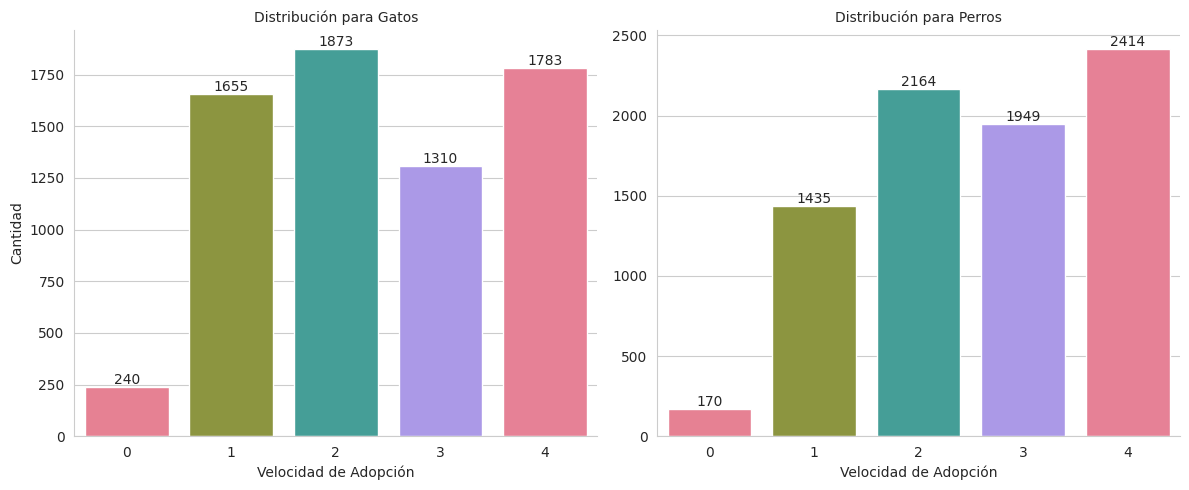

In [ ]:
# Preparar los datos
plot_data = train[train['Type'].isin([1, 2])].copy()
plot_data['Type'] = plot_data['Type'].map({1: 'Perros', 2: 'Gatos'})

# Configuración
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico
g = sns.FacetGrid(plot_data, col='Type', height=5, aspect=1.2, sharey=False)
g.map_dataframe(
    sns.countplot,
    x='AdoptionSpeed',
    hue='AdoptionSpeed',  # Soluciona el warning de palette
    palette='husl',
    order=sorted(plot_data['AdoptionSpeed'].unique()),
    legend=False  # Evita que muestre la leyenda de hue
)

# Configurar títulos y etiquetas
g.set_axis_labels('Velocidad de Adopción', 'Cantidad')
g.set_titles(col_template='Distribución para {col_name}')  # Corrige el KeyError

# Añadir los valores en las barras
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

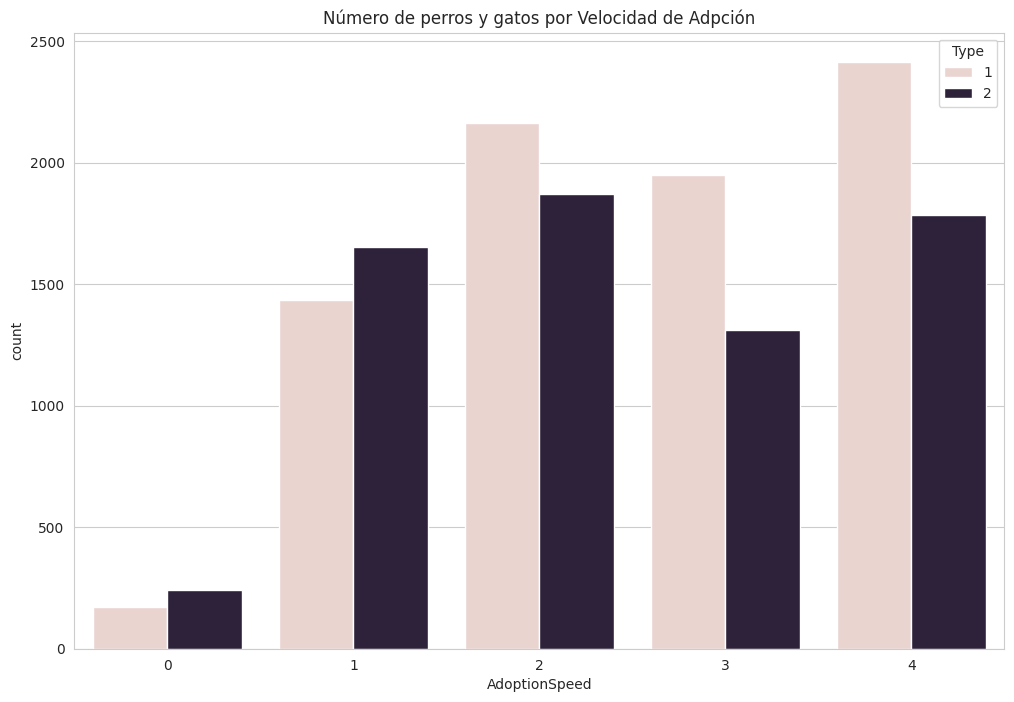

In [ ]:
sns.countplot(x='AdoptionSpeed', data=train, hue='Type');
plt.title('Número de perros y gatos por Velocidad de Adpción');

In [ ]:
# Mapeamos el Tipo de Mascota
train_temp = train.copy()
train_temp['Type'] = train_temp['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
train_temp.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,Dog,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,Dog,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


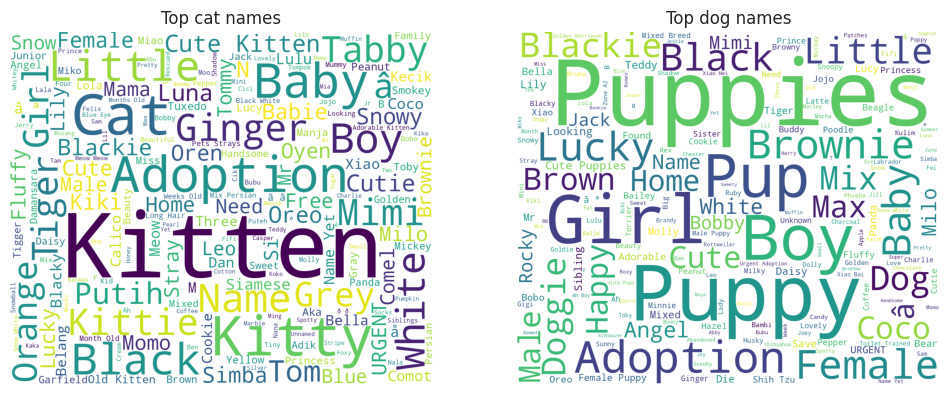

In [ ]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train_temp.loc[train_temp['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train_temp.loc[train_temp['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [ ]:
print('Nombres más populares de mascotas y su Velocidad de Adopción')
for n in train ['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')

Nombres más populares de mascotas y su Velocidad de Adopción
Baby
AdoptionSpeed
0     2
1    11
2    15
3    11
4    27
Name: count, dtype: int64

Lucky
AdoptionSpeed
0     5
1    14
2    16
3    12
4    17
Name: count, dtype: int64

No Name
AdoptionSpeed
0     3
1    14
2    11
3     6
4    20
Name: count, dtype: int64

Brownie
AdoptionSpeed
0     1
1    11
2    14
3    12
4    16
Name: count, dtype: int64

Mimi
AdoptionSpeed
0     3
1    12
2    13
3     7
4    17
Name: count, dtype: int64



In [ ]:
# Obtener los 3 nombres más populares por tipo con sus conteos
top_names_detailed = (
    train[train['Type'].isin([1, 2])]
    .assign(Animal_Type=lambda x: x['Type'].map({1: 'Perro', 2: 'Gato'}))
    .groupby(['Animal_Type', 'Name'])
    .size()
    .reset_index(name='Total')
    .sort_values(['Animal_Type', 'Total'], ascending=[True, False])
    .groupby('Animal_Type')
    .head(5)
)

# Mostrar como tabla ordenada
# print("Nombres más populares por tipo de mascota:")
# display(top_names_detailed)

# Mostrar distribución de adopción para estos nombres
for tipo in ['Perro', 'Gato']:
    nombres = top_names_detailed[top_names_detailed['Animal_Type'] == tipo]['Name']
    subset = train[(train['Type'] == (1 if tipo == 'Perro' else 2)) &
                  (train['Name'].isin(nombres))]

    print(f"\nDistribución para {tipo}s:")
    display(
        subset.groupby(['Name', 'AdoptionSpeed'])
        .size()
        .unstack()
        .fillna(0)
        .astype(int)
    )


Distribución para Perros:


AdoptionSpeed,0,1,2,3,4
Name,,,,,
Baby,1,4,8,5,14
Brownie,1,9,9,9,16
Lucky,2,12,12,10,12
Max,0,7,9,9,10
Puppy,1,7,7,11,19



Distribución para Gatos:


AdoptionSpeed,0,1,2,3,4
Name,,,,,
Baby,1,7,7,6,13
Kittens,0,8,13,5,13
Kitty,1,13,7,8,9
Mimi,2,11,7,5,8
No Name,2,12,9,4,12


In [ ]:
# 1. Obtenemos los 5 nombres más populares por tipo (Perro/Gato)
top_names = (
    train[train['Type'].isin([1, 2])]
    .assign(Animal_Type=lambda x: x['Type'].map({1: 'Perro', 2: 'Gato'}))
    .groupby(['Animal_Type', 'Name'])
    .size()
    .reset_index(name='Total')
    .sort_values(['Animal_Type', 'Total'], ascending=[True, False])
    .groupby('Animal_Type')
    .head(5)
)

# 2. Calculamos las velocidades de adopción CORRECTAMENTE
results = []
for _, row in top_names.iterrows():
    animal_type = row['Animal_Type']
    name = row['Name']
    type_code = 1 if animal_type == 'Perro' else 2

    adoption_counts = (
        train[(train['Type'] == type_code) & (train['Name'] == name)]
        ['AdoptionSpeed']
        .value_counts()
        .sort_index()
    )

    for speed, count in adoption_counts.items():
        results.append({
            'Tipo': animal_type,
            'Nombre': name,
            'Velocidad Adopción': speed,
            'Cantidad': count,
            'Total': row['Total']
        })

# 3. Creamos un DataFrame estructurado
results_df = pd.DataFrame(results)

# 4. Mostramos los resultados en formato tabular profesional
print("═"*70)
print("TOP 5 NOMBRES MÁS POPULARES POR TIPO CON DISTRIBUCIÓN EXACTA")
print("═"*70)

for tipo in ['Perro', 'Gato']:
    print(f"\n🔹 {tipo.upper()}S:")
    subset = results_df[results_df['Tipo'] == tipo]

    # Tabla resumen
    summary_table = (
        subset.pivot_table(index='Nombre',
                         columns='Velocidad Adopción',
                         values='Cantidad',
                         aggfunc='sum',
                         fill_value=0)
        .astype(int)
        .assign(Total=subset.groupby('Nombre')['Cantidad'].sum())
    )

    display(summary_table)

    # Detalle completo
    print("\n📊 Detalle completo:")
    detailed_view = subset[['Nombre', 'Velocidad Adopción', 'Cantidad']]
    display(detailed_view.sort_values(['Nombre', 'Velocidad Adopción']))

══════════════════════════════════════════════════════════════════════
TOP 5 NOMBRES MÁS POPULARES POR TIPO CON DISTRIBUCIÓN EXACTA
══════════════════════════════════════════════════════════════════════

🔹 PERROS:


Velocidad Adopción,0,1,2,3,4,Total
Nombre,,,,,,
Baby,1,4,8,5,14,32
Brownie,1,9,9,9,16,44
Lucky,2,12,12,10,12,48
Max,0,7,9,9,10,35
Puppy,1,7,7,11,19,45



📊 Detalle completo:


,Nombre,Velocidad Adopción,Cantidad
43,Baby,0,1
44,Baby,1,4
45,Baby,2,8
46,Baby,3,5
47,Baby,4,14
34,Brownie,0,1
35,Brownie,1,9
36,Brownie,2,9
37,Brownie,3,9
38,Brownie,4,16



🔹 GATOS:


Velocidad Adopción,0,1,2,3,4,Total
Nombre,,,,,,
Baby,1,7,7,6,13,34
Kittens,0,8,13,5,13,39
Kitty,1,13,7,8,9,38
Mimi,2,11,7,5,8,33
No Name,2,12,9,4,12,39



📊 Detalle completo:


,Nombre,Velocidad Adopción,Cantidad
14,Baby,0,1
15,Baby,1,7
16,Baby,2,7
17,Baby,3,6
18,Baby,4,13
0,Kittens,1,8
1,Kittens,2,13
2,Kittens,3,5
3,Kittens,4,13
9,Kitty,0,1


In [ ]:
# Join del dataset de train con el de razas para
train = reduce(lambda df, col: df.merge(razas, how='left', left_on=col, right_on='BreedID', suffixes=('', f'_{col}')),
    ['Breed1', 'Breed2'],
    train
)
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_Breed1,BreedName,BreedID_Breed2,Type_Breed2,BreedName_Breed2
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,NaN,NaN
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN


In [ ]:
train = reduce(lambda df, col: df.merge(colores, how='left', left_on=col, right_on='ColorID', suffixes=('', f'_{col}')),
              ['Color1', 'Color2', 'Color3'],
              train)
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_Breed1,BreedName,BreedID_Breed2,Type_Breed2,BreedName_Breed2,ColorID,ColorName,ColorID_Color2,ColorName_Color2,ColorID_Color3,ColorName_Color3
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,2,Brown,7.0,White,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,...,5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,...,850a43f90,3.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,NaN,NaN,NaN,NaN


In [ ]:
train = train.rename(columns={
    'BreedName': 'BreedName1',
    'BreedName_Breed2': 'BreedName2',
    'ColorName': 'ColorName1',
    'ColorName_Color2': 'ColorName2',
    'ColorName_Color3': 'ColorName3'
})
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_Breed1,BreedName1,BreedID_Breed2,Type_Breed2,BreedName2,ColorID,ColorName1,ColorID_Color2,ColorName2,ColorID_Color3,ColorName3
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,2,Brown,7.0,White,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,...,5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,...,850a43f90,3.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,NaN,NaN,NaN,NaN


In [ ]:
# Join del dataset de train con el de estados para poder ver los estados de las mascotas
train = train.merge(estados, how='left', left_on='State', right_on='StateID')
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,AdoptionSpeed,BreedID,Type_Breed1,BreedName1,BreedID_Breed2,Type_Breed2,BreedName2,ColorID,ColorName1,ColorID_Color2,ColorName2,ColorID_Color3,ColorName3,StateID,StateName
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,...,2,299.0,2.0,Tabby,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN,41326,Selangor
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,...,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,...,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,2,Brown,7.0,White,NaN,NaN,41326,Selangor
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,...,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,...,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,NaN,NaN,NaN,NaN,41326,Selangor


In [ ]:
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'BreedID', 'Type_Breed1', 'BreedName1', 'BreedID_Breed2', 'Type_Breed2',
       'BreedName2', 'ColorID', 'ColorName1', 'ColorID_Color2', 'ColorName2',
       'ColorID_Color3', 'ColorName3', 'StateID', 'StateName'],
      dtype='object')

In [ ]:
# Eliminamos colummnas innecesrias
# Columnas a eliminar
cols_innecesarias = ['BreedID','Type_Breed1','BreedID_Breed2','Type_Breed2','ColorID','ColorID_Color2','ColorID_Color3','StateID']

# Verificar que existen
cols_existentes = [col for col in cols_innecesarias if col in train.columns]

# Eliminar
train.drop(columns=cols_existentes, inplace=True)

# Verificar resultado
print(f"Columnas restantes: {list(train.columns)}")

Columnas restantes: ['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed', 'BreedName1', 'BreedName2', 'ColorName1', 'ColorName2', 'ColorName3', 'StateName']


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [ ]:
train.isna().sum() / train.shape[0] * 100

,0
Type,0.000000
Name,8.437271
Age,0.000000
Breed1,0.000000
Breed2,0.000000
Gender,0.000000
Color1,0.000000
Color2,0.000000
Color3,0.000000
MaturitySize,0.000000


In [ ]:
cols_con_na = train.columns[train.isna().any()].tolist()

In [ ]:
cols_con_na

['Name', 'Description', 'BreedName1', 'BreedName2', 'ColorName2', 'ColorName3']

In [ ]:
train = train.drop(columns=cols_con_na)

In [ ]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,ColorName1,StateName
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2,Black,Selangor
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,Black,Kuala Lumpur
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3,Brown,Selangor
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2,Black,Kuala Lumpur
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2,Black,Selangor


In [ ]:
train = train.drop(columns=['RescuerID', 'PetID', 'StateName', 'ColorName1'])

In [ ]:
train.isna().sum() / train.shape[0] * 100

,0
Type,0.0
Age,0.0
Breed1,0.0
Breed2,0.0
Gender,0.0
Color1,0.0
Color2,0.0
Color3,0.0
MaturitySize,0.0
FurLength,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # o DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, accuracy_score, balanced_accuracy_score #Metricas

In [ ]:
X = train.drop(columns=['AdoptionSpeed'])
y = train['AdoptionSpeed']

In [ ]:
# Supongamos que tus datos están en X (features) e y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
10070,1,2,307,307,1,1,0,0,2,2,2,1,2,1,3,0,41326,0,8.0
13397,1,12,307,0,2,2,0,0,1,1,1,1,1,1,1,0,41326,0,3.0
14656,1,2,307,307,1,1,2,7,2,1,2,2,2,1,1,0,41326,0,1.0
5596,1,2,307,307,1,3,0,0,2,2,1,1,2,1,1,0,41326,0,2.0
13463,2,4,265,0,3,1,2,0,2,2,2,2,2,1,4,0,41326,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,2,8,265,299,2,1,2,0,2,2,1,1,2,1,1,0,41326,0,2.0
10249,1,2,307,0,2,6,7,0,1,1,2,1,3,1,1,0,41326,0,1.0
12468,1,2,307,307,1,1,0,0,2,2,1,1,2,1,1,0,41401,0,2.0
1081,1,2,307,307,1,1,2,7,2,2,2,2,2,1,1,0,41326,0,2.0


In [ ]:
import numpy as np

In [ ]:
depths = range(1, 21)  # Profundidades del 1 al 20 (podés ajustarlo)
mean_scores = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean_scores.append(np.mean(scores))

# Profundidad con mejor performance
opt_depth = depths[np.argmax(mean_scores)]
print(f"Profundidad óptima: {opt_depth}")

Profundidad óptima: 5


In [ ]:
mean_scores

[np.float64(0.34950843084813277),
 np.float64(0.35434436992616813),
 np.float64(0.3689338864782762),
 np.float64(0.37251965216254623),
 np.float64(0.3815237513823698),
 np.float64(0.37618774294682833),
 np.float64(0.37802277916048566),
 np.float64(0.38077336922077276),
 np.float64(0.37402045125140754),
 np.float64(0.36885093559625376),
 np.float64(0.3671002756569755),
 np.float64(0.36576704708418606),
 np.float64(0.36368159376943615),
 np.float64(0.3540940571220772),
 np.float64(0.3483411040393881),
 np.float64(0.34625721517966374),
 np.float64(0.3430053041978501),
 np.float64(0.3375028029819208),
 np.float64(0.33325019703441905),
 np.float64(0.3347506832322753)]

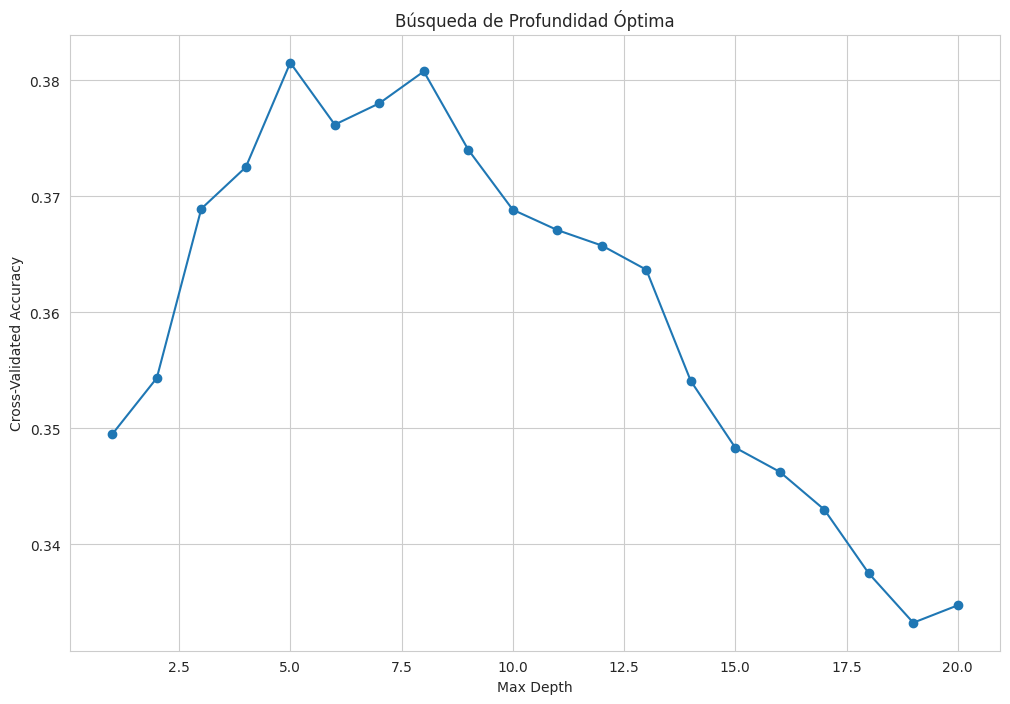

In [ ]:
plt.plot(depths, mean_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Búsqueda de Profundidad Óptima')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold

In [ ]:
# Rango de profundidades a probar
depths = range(1, 21)
mean_kappas = []

# Validación cruzada manual con Cohen's Kappa
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for d in depths:
    kappa_scores = []
    for train_idx, val_idx in cv.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = DecisionTreeClassifier(max_depth=d, random_state=42)
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        kappa_scores.append(cohen_kappa_score(y_val, y_val_pred))

    mean_kappas.append(np.mean(kappa_scores))

# Encontrar la mejor profundidad
opt_depth = depths[np.argmax(mean_kappas)]
print(f"Mejor profundidad segun Cohen's Kappa: {opt_depth}")

Mejor profundidad segun Cohen's Kappa: 8


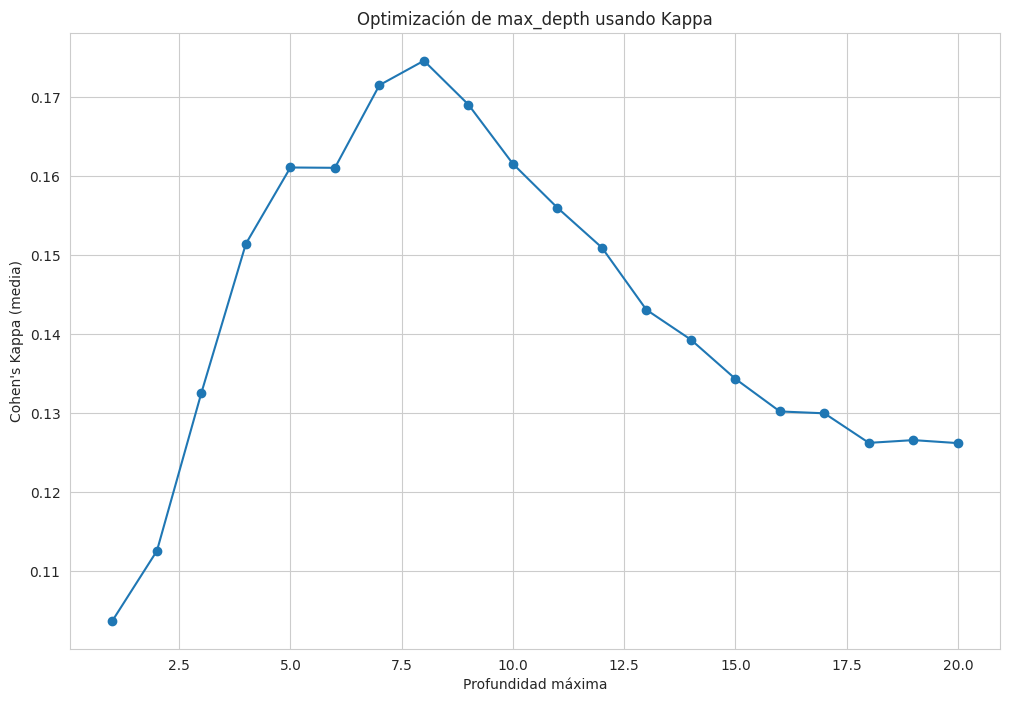

In [ ]:
plt.plot(depths, mean_kappas, marker='o')
plt.xlabel('Profundidad máxima')
plt.ylabel("Cohen's Kappa (media)")
plt.title("Optimización de max_depth usando Kappa")
plt.grid(True)
plt.show()

In [ ]:
mean_kappas

[np.float64(0.10372118509379372),
 np.float64(0.11257028910305344),
 np.float64(0.1325948184951575),
 np.float64(0.1514710519462591),
 np.float64(0.16112335272481904),
 np.float64(0.161081601176503),
 np.float64(0.17155164601862094),
 np.float64(0.1746454732873421),
 np.float64(0.1690910065570895),
 np.float64(0.16158852031001517),
 np.float64(0.15602467468510417),
 np.float64(0.15097684180763102),
 np.float64(0.14310254377148487),
 np.float64(0.13931899408760756),
 np.float64(0.1343537827035221),
 np.float64(0.13022472737612903),
 np.float64(0.12999058782845702),
 np.float64(0.12624718047378194),
 np.float64(0.1265949439960251),
 np.float64(0.12621518148227623)]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Entrenar árbol con la profundidad óptima
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

# Predecir
y_pred = clf.predict(X_test)

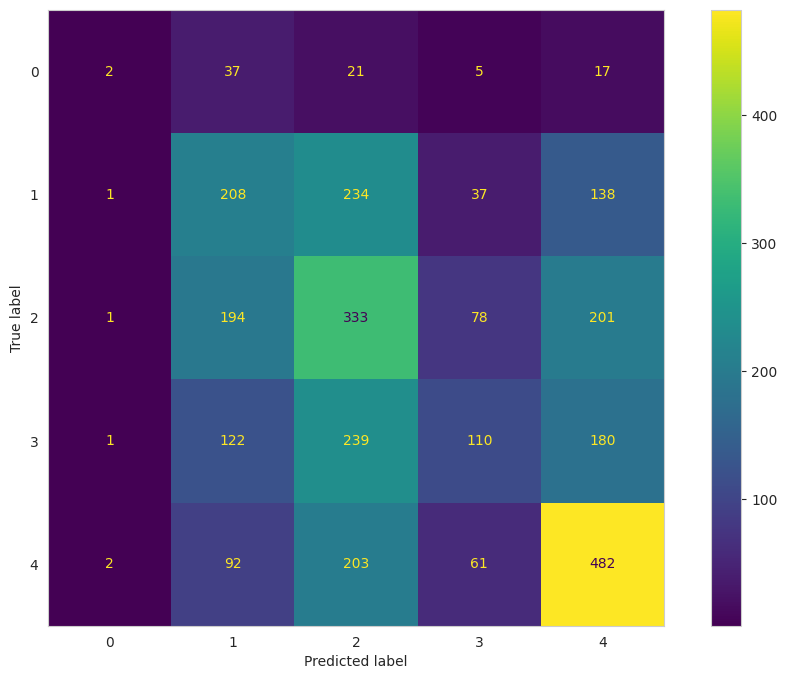

In [ ]:
# Crear el display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Quitar el grid
ax.grid(False)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer

In [ ]:
# Definir el scorer personalizado
kappa_scorer = make_scorer(cohen_kappa_score)

# Definir el modelo base
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=kappa_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mostrar mejores resultados
print("Mejores hiperparámetros según GridSearchCV con Cohen's Kappa:")
print(grid_search.best_params_)
print(f"Mejor score de Kappa: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros según GridSearchCV con Cohen's Kappa:
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score de Kappa: 0.2109


In [ ]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# Mejor modelo
best_model = grid_search.best_estimator_

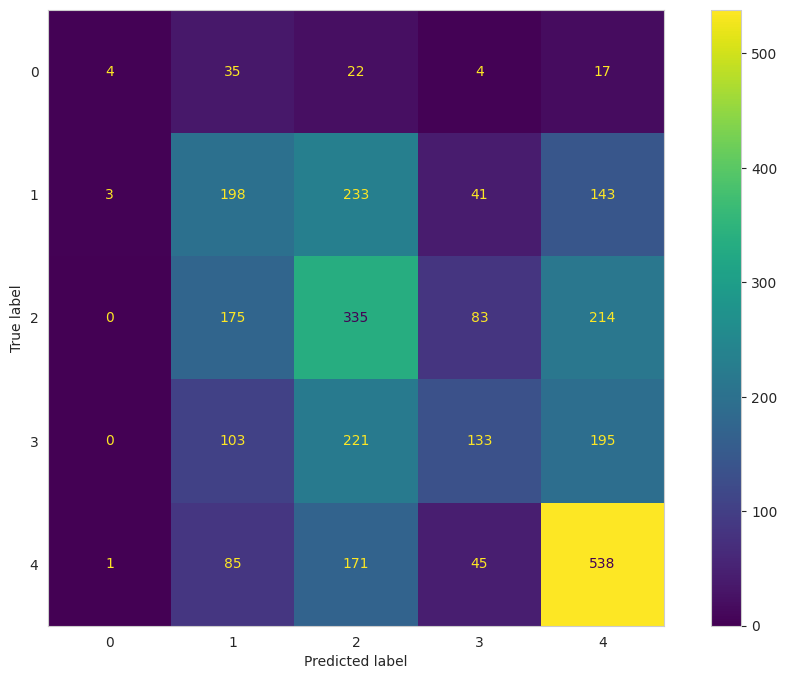

In [ ]:
# Predecir en test
y_pred = best_model.predict(X_test)

# Crear matriz
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)  # Sin rejilla
plt.show()

In [ ]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")

Cohen's Kappa: 0.199


In [ ]:
best_model.feature_importances_

array([0.01356654, 0.13691297, 0.09543055, 0.05975546, 0.04121748,
       0.06700765, 0.06628532, 0.03584803, 0.04151844, 0.04143702,
       0.03405048, 0.03282084, 0.04195947, 0.01148203, 0.04446441,
       0.04497697, 0.06079564, 0.01296036, 0.11751034])

In [ ]:
# Asociarlas con los nombres de las columnas
importancia_df = pd.DataFrame({
    'feature': X_train.columns,
    'importancia': best_model.feature_importances_
}).sort_values(by='importancia', ascending=False)

print(importancia_df)

         feature  importancia
1            Age     0.136913
18      PhotoAmt     0.117510
2         Breed1     0.095431
5         Color1     0.067008
6         Color2     0.066285
16         State     0.060796
3         Breed2     0.059755
15           Fee     0.044977
14      Quantity     0.044464
12    Sterilized     0.041959
8   MaturitySize     0.041518
9      FurLength     0.041437
4         Gender     0.041217
7         Color3     0.035848
10    Vaccinated     0.034050
11      Dewormed     0.032821
0           Type     0.013567
17      VideoAmt     0.012960
13        Health     0.011482


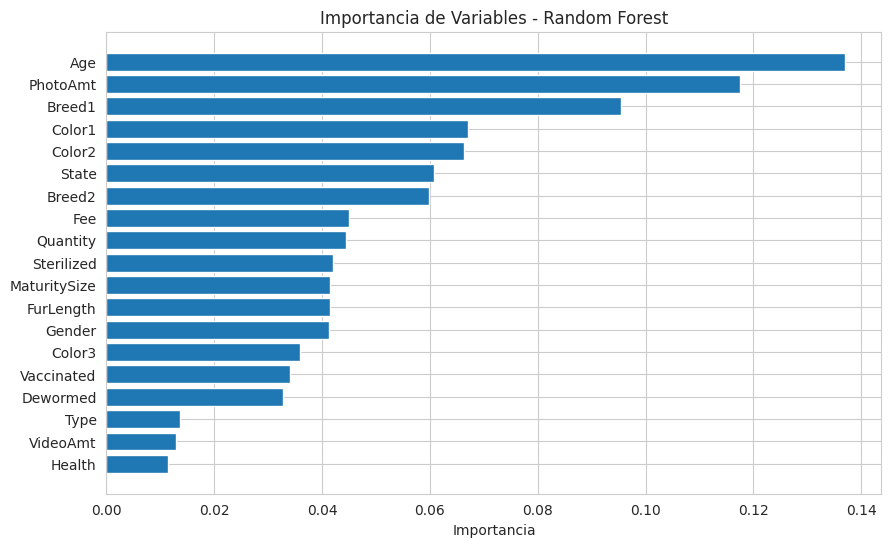

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(importancia_df['feature'], importancia_df['importancia'])
plt.gca().invert_yaxis()
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Random Forest")
plt.show()

#Alberto

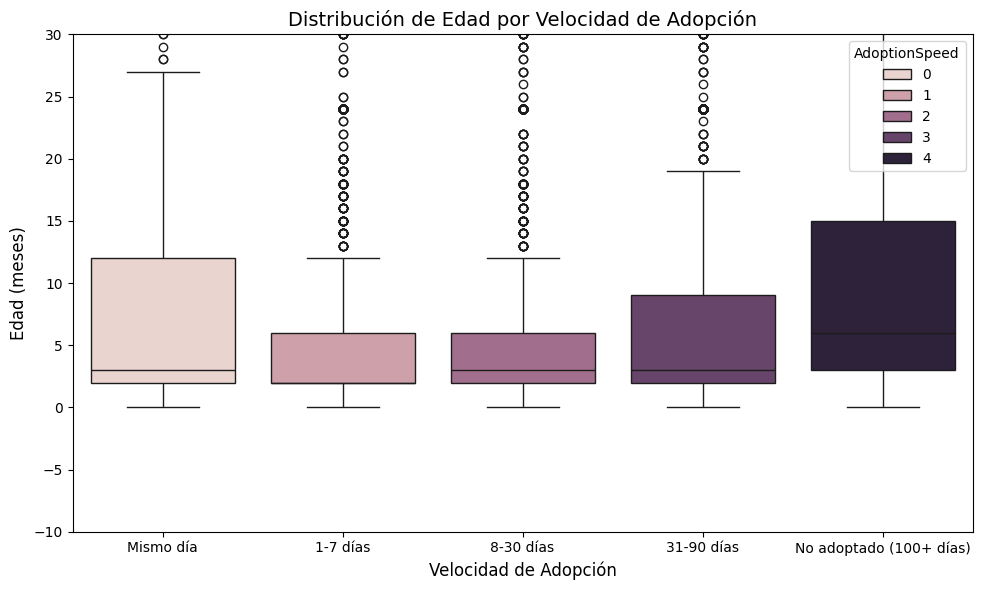

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Age', data=train, hue='AdoptionSpeed')

# Personalizar el gráfico
plt.title('Distribución de Edad por Velocidad de Adopción', fontsize=14)
plt.xlabel('Velocidad de Adopción', fontsize=12)
plt.ylabel('Edad (meses)', fontsize=12)
plt.xticks([0, 1, 2, 3, 4],
           ['Mismo día', '1-7 días', '8-30 días', '31-90 días', 'No adoptado (100+ días)'])

# Mostrar el gráfico
plt.tight_layout()
plt.ylim(0,30)
plt.show()

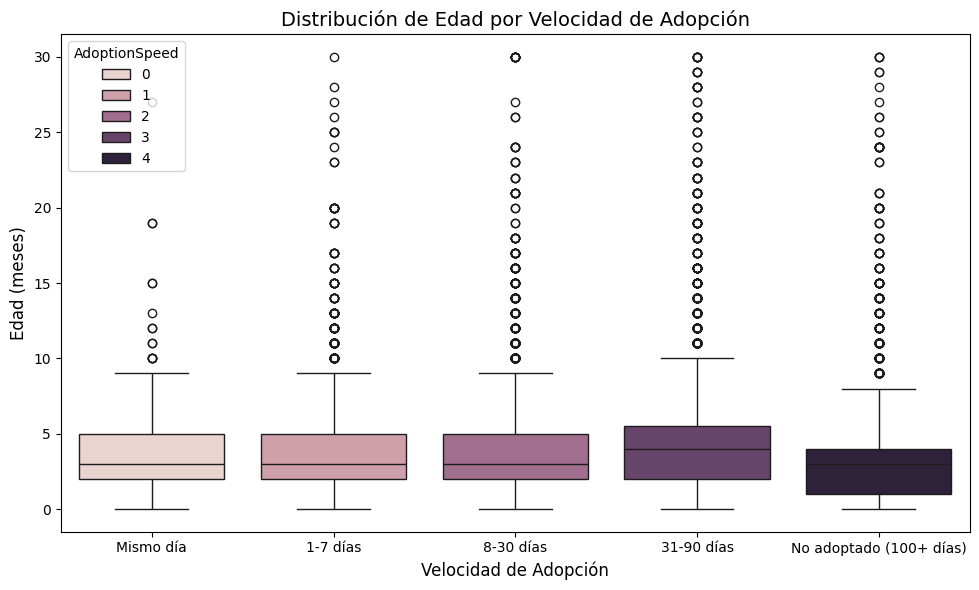

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='PhotoAmt', data=train, hue='AdoptionSpeed')

# Personalizar el gráfico
plt.title('Distribución de Edad por Velocidad de Adopción', fontsize=14)
plt.xlabel('Velocidad de Adopción', fontsize=12)
plt.ylabel('Edad (meses)', fontsize=12)
plt.xticks([0, 1, 2, 3, 4],
           ['Mismo día', '1-7 días', '8-30 días', '31-90 días', 'No adoptado (100+ días)'])

# Mostrar el gráfico
plt.tight_layout()
#plt.ylim(0,30)
plt.show()

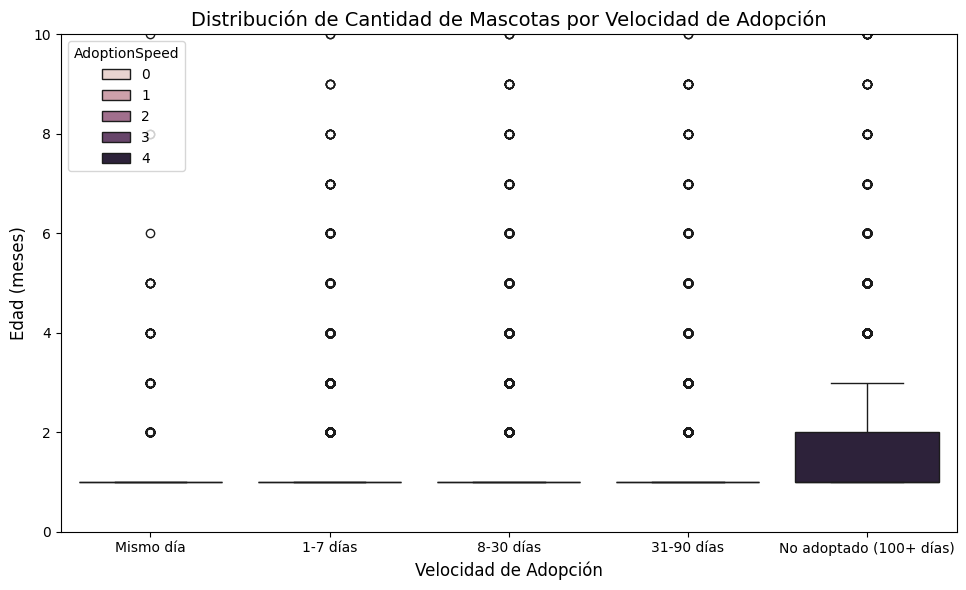

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Quantity', data=train, hue='AdoptionSpeed')

# Personalizar el gráfico
plt.title('Distribución de Cantidad de Mascotas por Velocidad de Adopción', fontsize=14)
plt.xlabel('Velocidad de Adopción', fontsize=12)
plt.ylabel('Edad (meses)', fontsize=12)
plt.xticks([0, 1, 2, 3, 4],
           ['Mismo día', '1-7 días', '8-30 días', '31-90 días', 'No adoptado (100+ días)'])

# Mostrar el gráfico
plt.tight_layout()
plt.ylim(0,10)
plt.show()

In [ ]:
# Contar frecuencias de cada valor en 'Quantity'
quantity_counts = train['Quantity'].value_counts().sort_index()  # Ordenar por valor de Quantity

# Mostrar el resultado
print("Cantidad de registros por cada valor de 'Quantity':")
print(quantity_counts)

Cantidad de registros por cada valor de 'Quantity':
Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
11       10
12        6
13        2
14        2
15        4
16        3
17        3
18        1
20       12
Name: count, dtype: int64


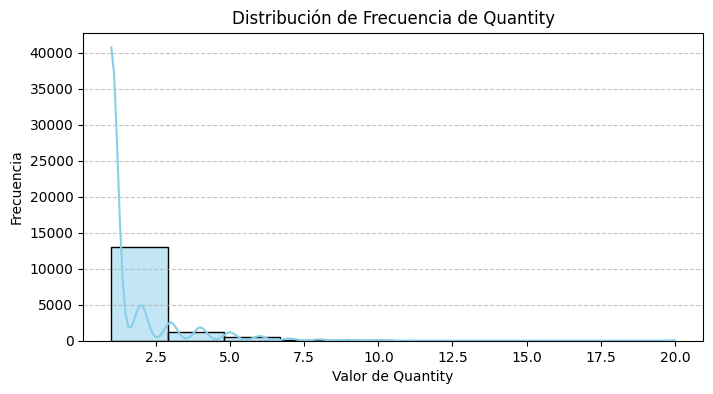

In [ ]:
# Crear histograma
plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Quantity', bins=10, kde=True, color='skyblue', edgecolor='black')

# Personalización
plt.title('Distribución de Frecuencia de Quantity')
plt.xlabel('Valor de Quantity')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Experimentando la creación de nuevas variables
train_exp = pd.read_csv('/content/drive/MyDrive/Labo2/train/train.csv')

In [ ]:
# --- 1. AgeGroup: Clasificar la edad en categorías ---
def get_age_group(age):
    if age <= 1:
        return "Cachorro/Gatito"
    elif 1 < age <= 3:
        return "Joven"
    elif 3 < age <= 8:
        return "Adulto"
    else:
        return "Senior"

train_exp['AgeGroup'] = train_exp['Age'].apply(get_age_group)

In [ ]:
# --- 3. HealthStatus: Combinar estado de salud ---
def get_health_status(row):
    score = 0
    if row['Vaccinated'] == 1:
        score += 1
    if row['Dewormed'] == 1:
        score += 1
    if row['Sterilized'] == 1:
        score += 1
    if row['Health'] == 1:
        score += 1

    if score == 4:
        return "Excelente"
    elif score >= 2:
        return "Bueno"
    else:
        return "Regular"

train_exp['HealthStatus'] = train_exp.apply(get_health_status, axis=1)

In [ ]:
# --- 4. FeeCategory: Categorizar el costo de adopción ---
# Ver si estos valores están ok
def get_fee_category(fee):
    if fee == 0:
        return "Gratis"
    elif 0 < fee <= 100:
        return "Bajo"
    elif 100 < fee <= 300:
        return "Medio"
    else:
        return "Alto"

train_exp['FeeCategory'] = train_exp['Fee'].apply(get_fee_category)

In [ ]:
# Viendo si con las palabras que hay en la Descripción, podemos llegar a hacer alguna agrupación
# Lo dejo pendiente...
# nltk.download('stopwords')

from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Concatenar todas las descripciones
all_text = ' '.join(train_exp['Description'].dropna())

# Limpiar el texto: sacar puntuación, pasar a minúsculas
all_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenizar
words = all_text.split()

# Eliminar stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Contar palabras
word_counts = Counter(words)

# Mostrar las 20 palabras más comunes
print(word_counts.most_common(40))

[('home', 7615), ('please', 5710), ('dog', 4355), ('adoption', 3938), ('cat', 3839), ('good', 3524), ('adopt', 3265), ('2', 2939), ('give', 2909), ('found', 2811), ('old', 2783), ('contact', 2773), ('interested', 2749), ('looking', 2722), ('playful', 2651), ('love', 2642), ('loving', 2602), ('call', 2523), ('kitten', 2521), ('care', 2454), ('one', 2337), ('puppy', 2249), ('cats', 2231), ('3', 2220), ('healthy', 2205), ('take', 2165), ('owner', 2165), ('rescued', 2151), ('like', 2080), ('active', 2077), ('house', 2061), ('new', 2032), ('kittens', 2015), ('friendly', 1985), ('months', 1931), ('dogs', 1905), ('food', 1856), ('cute', 1851), ('would', 1843), ('puppies', 1813)]


In [ ]:
# --- 5. DescriptionLength y DescriptionQuality ---
#df['DescriptionLength'] = df['Description'].str.len().fillna(0)
#df['DescriptionQuality'] = df['Description'].apply(
#    lambda x: "Alta" if x and ("juguetón" in x.lower() or "amigable" in x.lower()) else "Normal"
#)

In [ ]:
# --- 6. MixedBreed: ¿Es raza mixta? ---
train_exp['MixedBreed'] = train_exp['Breed2'].apply(lambda x: "Sí" if x != 0 else "No")

In [ ]:
# --- 7. ColorCount: Contar colores ---
train_exp['ColorCount'] = train_exp[['Color1', 'Color2', 'Color3']].apply(
    lambda row: sum(1 for color in row if color != 0), axis=1
)

In [ ]:
# --- 9. BreedPopularity: Popularidad de la raza ---
breed_counts = train_exp['Breed1'].value_counts().to_dict()
train_exp['BreedPopularity'] = train_exp['Breed1'].map(breed_counts)

In [ ]:
# --- 10. HasVideo: ¿Tiene video? ---
train_exp['HasVideo'] = train_exp['VideoAmt'].apply(lambda x: "Sí" if x > 0 else "No")

In [ ]:
# --- 11. PhotoAmtCategory: Categorizar cantidad de fotos ---
def get_photo_category(amt):
    if amt == 0:
        return "Ninguna"
    elif 1 <= amt <= 3:
        return "Pocas"
    else:
        return "Varias"

train_exp['PhotoAmtCategory'] = train_exp['PhotoAmt'].apply(get_photo_category)

In [ ]:
# --- 14. HasName: ¿Tiene nombre? ---
train_exp['HasName'] = train_exp['Name'].apply(lambda x: "Sí" if pd.notna(x) and x != "" else "No")

In [ ]:
train_exp.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,AgeGroup,HealthStatus,FeeCategory,MixedBreed,ColorCount,BreedPopularity,HasVideo,PhotoAmtCategory,HasName
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,...,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,Joven,Regular,Bajo,No,2,342,No,Pocas,Sí
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,...,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Cachorro/Gatito,Regular,Gratis,No,2,1258,No,Pocas,Sí
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,...,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,Cachorro/Gatito,Bueno,Gratis,No,2,5927,No,Varias,Sí
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,...,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,Adulto,Bueno,Medio,No,2,5927,No,Varias,Sí
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,...,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,Cachorro/Gatito,Regular,Gratis,No,1,5927,No,Pocas,Sí


# Marcelo